In [11]:
import numpy as np
import pandas as pd
import statistics
from sklearn.cross_validation import ShuffleSplit

In [12]:
# Import supplementary visualizations code visuals.py
#import visuals as vs

In [13]:
# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('C:/Users/victory/Desktop/machine-learning/projects/boston_housing/housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))

Boston housing dataset has 489 data points with 4 variables each.


In [14]:
# TODO: Minimum price of the data
minimum_price = min(prices)

# TODO: Maximum price of the data
maximum_price = max(prices)

# TODO: Mean price of the data
mean_price =  float(sum(prices)) / max(len(prices), 1)

# TODO: Median price of the data
median_price =  statistics.median(prices)

# TODO: Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${}".format(minimum_price)) 
print("Maximum price: ${}".format(maximum_price))
print("Mean price: ${}".format(mean_price))
print("Median price ${}".format(median_price))
print("Standard deviation of prices: ${}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $105000.0
Maximum price: $1024800.0
Mean price: $454342.9447852761
Median price $438900.0
Standard deviation of prices: $165171.13154429477


In [15]:
# Edited question #1
#Answer question 1:
# * if the RM (number of rooms) increased then the worth of the homes in the neighbourhood increase
# * if the LSTAT decreases this means the percentage of lower class owning houses decreases therefore the houses in this neighbourhood is mainly for rich people so its worth increases
# PTRATIO : we should expect a low price of houses given a high student-to-teacher ratio because of the lower need for houses in those areas 


In [16]:
# TODO: Import 'r2_score'
from sklearn.metrics import r2_score
def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

In [17]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))

Model has a coefficient of determination, R^2, of 0.923.


In [18]:
#Answer question 2:
# I consider this model to have successfully captured the variation of the target variable since the coefficient of 
#determination is clearly approaching 1 
# indicating that it perfectly predicts the target variable

In [22]:
#Edited the test size
from sklearn.model_selection import train_test_split
# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, 
                                                    test_size=0.20, 
                                                    random_state=12)

# Success
print("Training and testing split was successful.")

Training and testing split was successful.


In [43]:
# Edited answer 3 to elaborate more on train_test split 
#Answer question 3:
#We want to  train & test on the same set of data to be able to choose a machine learning model and estimate the likelyhood of it 
#performing out of sample data.
# However when increasing the training accuracy this will result in very complex models that overfit the training data.
# at first you might think this is great you are about to reach the target 100% unfortunetly this is not general 
# Therefore we tend to use the train/test split where data is split to 2 sets so the model can be trained and tested on 
# different data : the model will be tested on some data and there will be a portion of data the model has never seen before to measure 
# how the model will react to them to make sure the model is not extremly trained to fit a specific set of data 


In [24]:
import matplotlib.pyplot as pl
import sklearn.learning_curve as curves
from sklearn.tree import DecisionTreeRegressor
from sklearn.cross_validation import ShuffleSplit, train_test_split

def ModelLearning(X, y):
    """ Calculates the performance of several models with varying sizes of training data.
        The learning and testing scores for each model are then plotted. """
    
    # Create 10 cross-validation sets for training and testing
    cv = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.2, random_state = 0)

    # Generate the training set sizes increasing by 50
    train_sizes = np.rint(np.linspace(1, X.shape[0]*0.8 - 1, 9)).astype(int)

    # Create the figure window
    fig = pl.figure(figsize=(10,7))

    # Create three different models based on max_depth
    for k, depth in enumerate([1,3,6,10]):
        
        # Create a Decision tree regressor at max_depth = depth
        regressor = DecisionTreeRegressor(max_depth = depth)

        # Calculate the training and testing scores
        sizes, train_scores, test_scores = curves.learning_curve(regressor, X, y, \
            cv = cv, train_sizes = train_sizes, scoring = 'r2')
        
        # Find the mean and standard deviation for smoothing
        train_std = np.std(train_scores, axis = 1)
        train_mean = np.mean(train_scores, axis = 1)
        test_std = np.std(test_scores, axis = 1)
        test_mean = np.mean(test_scores, axis = 1)

        # Subplot the learning curve 
        ax = fig.add_subplot(2, 2, k+1)
        ax.plot(sizes, train_mean, 'o-', color = 'r', label = 'Training Score')
        ax.plot(sizes, test_mean, 'o-', color = 'g', label = 'Testing Score')
        ax.fill_between(sizes, train_mean - train_std, \
            train_mean + train_std, alpha = 0.15, color = 'r')
        ax.fill_between(sizes, test_mean - test_std, \
            test_mean + test_std, alpha = 0.15, color = 'g')
        
        # Labels
        ax.set_title('max_depth = %s'%(depth))
        ax.set_xlabel('Number of Training Points')
        ax.set_ylabel('Score')
        ax.set_xlim([0, X.shape[0]*0.8])
        ax.set_ylim([-0.05, 1.05])
    
    # Visual aesthetics
    ax.legend(bbox_to_anchor=(1.05, 2.05), loc='lower left', borderaxespad = 0.)
    fig.suptitle('Decision Tree Regressor Learning Performances', fontsize = 16, y = 1.03)
    fig.tight_layout()
    fig.show()


C:\Users\victory\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


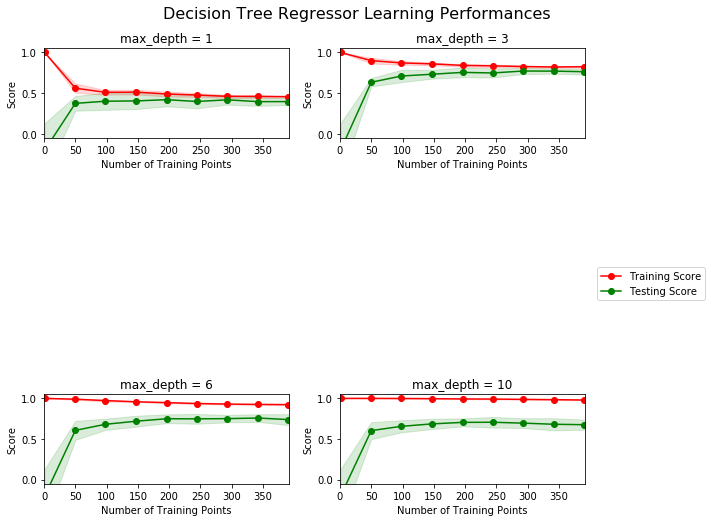

In [44]:
# Produce learning curves for varying training set sizes and maximum depths
ModelLearning(features, prices)

In [45]:
#Edited 
#Anwser question 4:
# 2 Graphs :
# Choosing the best scenario with max depth 3 second graph
# Because the testing score indicated by the green line increases as the training points increase 
# which is enables the model to generalize well
# Also the training score indicated in the graph using the red line decreases as the training points increase which 
# make it perfectly fits the dataset
# All of the above clarifies that there is no high variance problem or bias

# Choosing the worst scenario with max depth 1 first graph
# Testing score increase with the training points although this increase seams to stop at a very low point nearly 
# 0.4 which doesn't make this model eligible to generalize well for new data
# Also the training score decrases with the training points but to a very low score nearly 0.4 so the model
#doesn't seem to fit well 
# and the red line almost forms a straight line  that indicates that there is no hope for improvement of this model when 
# increasing the training points

In [46]:
def ModelComplexity(X, y):
    """ Calculates the performance of the model as model complexity increases.
        The learning and testing errors rates are then plotted. """
    
    # Create 10 cross-validation sets for training and testing
    cv = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.2, random_state = 0)

    # Vary the max_depth parameter from 1 to 10
    max_depth = np.arange(1,11)

    # Calculate the training and testing scores
    train_scores, test_scores = curves.validation_curve(DecisionTreeRegressor(), X, y, \
        param_name = "max_depth", param_range = max_depth, cv = cv, scoring = 'r2')

    # Find the mean and standard deviation for smoothing
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Plot the validation curve
    pl.figure(figsize=(7, 5))
    pl.title('Decision Tree Regressor Complexity Performance')
    pl.plot(max_depth, train_mean, 'o-', color = 'r', label = 'Training Score')
    pl.plot(max_depth, test_mean, 'o-', color = 'g', label = 'Validation Score')
    pl.fill_between(max_depth, train_mean - train_std, \
        train_mean + train_std, alpha = 0.15, color = 'r')
    pl.fill_between(max_depth, test_mean - test_std, \
        test_mean + test_std, alpha = 0.15, color = 'g')
    
    # Visual aesthetics
    pl.legend(loc = 'lower right')
    pl.xlabel('Maximum Depth')
    pl.ylabel('Score')
    pl.ylim([-0.05,1.05])
    pl.show()


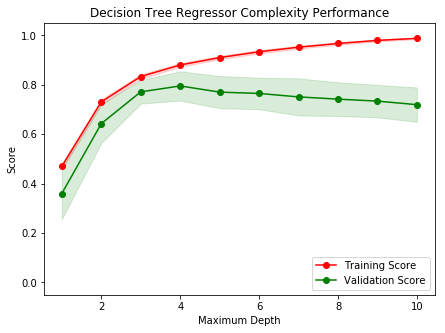

In [47]:
ModelComplexity(X_train, y_train)

In [48]:
#Answer question 5:
# High Bias :
# It is a sign of underfitting(model is not complex enough to pick up the nuances in the data) 
# High bias models have have a small or even no gap at all between the training and validations scores.
# Because it is unable to fit the model well and unable to generalize well
# which will eventually lead to training and validations scores converging to a similar low score.
# High Variance :
# It is a sign of overfitting(model is by-hearting the data and cannot generalize well
# High variance models have a gap between the training and validation scores.
# This is because it is able to fit the model well but unable to generalize well
# leading to a  high training score but low validation score.
# Max depth =1 high bias because there is nearly no gap between both scores which means model is not fitting dataset 
#and not generalizing well therefore it suffers from high bias 
#Max depth = 10 high variance because the training score is high and testing score is low there is a gap between 
#training and testing scores this means that the model fits the dataset well but will have a problem generalizing 


In [49]:
#Answer question 6:
# Max depth =4 because the training score seems to stop (continue as a straight line from now on) indicating the highest 
# likelyhood for a model to generalize well to new data
#Also the gap between the training score and testing score is not large,
#meaning the model may not suffer from high variance as well

In [50]:
#Answer question 7:
# Grid search technique :
# Allows us to define a grid of parameters that will be searched using K-fold cross-validation. It tries nearly
# every combination of the provided hyper-parameter values in order to find the best model.
#It helps us to optimize the learning algorithms by finding highest cross-validation accuracy 
#that matches with the corresponding parameters.


In [51]:
#Answer question 8:
#K-fold cross-validation:
# Dataset is split into K number "folds" of equal size.
# Fold : acts as the testing set 1 time, and acts as the training set K-1 times.
# CV(cross-valdation) performance/Average testing performance is used as the estimate of out-of-sample performance.
#Benefit of this technique to grid search when optimizing a model:
# 1-More reliable estimate of out-of-sample performance than train/test split.
# 2-Reduce the variance of a single trial of a train/test split.
# Using the above mentioned benifits of k-fold cross-validation:
# we can use the average testing accuracy as a benchmark to decide which is the most optimal 
#set of parameters for the learning algorithm.
#However a drawback of this technique is that it doesn't work well with formally distributed data (sorted)

In [52]:
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [53]:
def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    # sklearn version 0.18: ShuffleSplit(n_splits=10, test_size=0.1, train_size=None, random_state=None)
    # sklearn versiin 0.17: ShuffleSplit(n, n_iter=10, test_size=0.1, train_size=None, random_state=None)
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor(random_state=0)

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    dictionaryRange = range(1, 11)
    params = dict(max_depth=dictionaryRange)

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    grid = GridSearchCV(regressor, params, scoring_fnc, cv=cv_sets)



    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

In [54]:
reg = fit_model(X_train, y_train)

In [55]:
reg.get_params()

{'criterion': 'mse',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': 0,
 'splitter': 'best'}

In [56]:
# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 4 for the optimal model.


In [57]:
#Answer question 9:
The optimal model has a maximum depth of 4.

SyntaxError: invalid syntax (<ipython-input-57-35ca5934b309>, line 2)

In [58]:
#Answer question 10:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

Predicted selling price for Client 1's home: $410,146.15
Predicted selling price for Client 2's home: $226,036.36
Predicted selling price for Client 3's home: $887,100.00


In [59]:
def PredictTrials(X, y, fitter, data):
    """ Performs trials of fitting and predicting data. """

    # Store the predicted prices
    prices = []

    for k in range(10):
        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(X, y, \
            test_size = 0.2, random_state = k)
        
        # Fit the data
        reg = fitter(X_train, y_train)
        
        # Make a prediction
        pred = reg.predict([data[0]])[0]
        prices.append(pred)
        
        # Result
        print("Trial {}: ${:,.2f}".format(k+1, pred))

    # Display price range
    print("\nRange in prices: ${:,.2f}".format(max(prices) - min(prices)))

In [60]:
PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $424,935.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $418,377.27
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $73,357.39


In [61]:
#Answer question 11 :
# the data collected may not be applicable because the demographics and other features  are constantly changing
# therefore this learning algorithm learned from a very old dataset that may not be relevant because demographics have changed 
#a lot since 1978.
